In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, pprint

from scipy.stats import pearsonr
from sklearn.metrics import f1_score

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
# =pd.read_csv(".csv", sep=";",index_col=0)
train_questions=pd.read_csv("train_questions.csv", sep=";",index_col=0)
train_ref_ans=pd.read_csv("train_ref_ans.csv", sep=";",index_col=0)
train_stud_ans=pd.read_csv("train_stud_ans.csv", sep=";",index_col=0)
test_questions=pd.read_csv("test_questions.csv", sep=";",index_col=0)
test_ref_ans=pd.read_csv("test_ref_ans.csv", sep=";",index_col=0)
test_stud_ans=pd.read_csv("test_stud_ans.csv", sep=";",index_col=0)

train_answers=pd.read_csv("train_answers.csv", sep=";",index_col=0)
test_answers=pd.read_csv("test_answers.csv", sep=";",index_col=0)

In [3]:
# test_divs=['TEST Beetle Unseen Answers',
#            'TEST Beetle Unseen Questions',
#            'TEST sciEntsBank Unseen Answers',
#            'TEST sciEntsBank Unseen Questions',
#            'TEST sciEntsBank Unseen Domains']

test_divs=['TEST Beetle Unseen Answers',
           'TEST sciEntsBank Unseen Answers']
test_answers=test_answers[(test_answers['dtset'] == "TEST Beetle Unseen Answers") | (test_answers['dtset'] == "TEST sciEntsBank Unseen Answers")]

In [4]:
test_answers

,dtset,qtype,stype,quest_id,question,ref_ans,st_answ,id_st,st_ans_calif
0,TEST sciEntsBank Unseen Answers,NaN,NaN,EM_45b,You used several methods to separate and ident...,"The water was evaporated, leaving the salt.",We evaporated the water.,EM.45b.299.1,1
1,TEST sciEntsBank Unseen Answers,NaN,NaN,EM_45b,You used several methods to separate and ident...,"The water was evaporated, leaving the salt.",We poured just the water into another thing an...,EM.45b.387.1,1
2,TEST sciEntsBank Unseen Answers,NaN,NaN,EM_45b,You used several methods to separate and ident...,"The water was evaporated, leaving the salt.",We kept the salt in the vial and put the water...,EM.45b.452.1,0
3,TEST sciEntsBank Unseen Answers,NaN,NaN,EM_45b,You used several methods to separate and ident...,"The water was evaporated, leaving the salt.",Get all the water out.,EM.45b.533.1,0
4,TEST sciEntsBank Unseen Answers,NaN,NaN,EM_45c,You used several methods to separate and ident...,The crystals were square with Xs on the surface.,Well because we broke them apart.,EM.45c.340.1,0
5,TEST sciEntsBank Unseen Answers,NaN,NaN,EM_45c,You used several methods to separate and ident...,The crystals were square with Xs on the surface.,By looking very closely at it.,EM.45c.385.1,0
6,TEST sciEntsBank Unseen Answers,NaN,NaN,EM_45c,You used several methods to separate and ident...,The crystals were square with Xs on the surface.,We know the crystals were salt because we iden...,EM.45c.396.1,0
7,TEST sciEntsBank Unseen Answers,NaN,NaN,EM_45c,You used several methods to separate and ident...,The crystals were square with Xs on the surface.,Because I look at the chart.,EM.45c.645.1,0
8,TEST sciEntsBank Unseen Answers,NaN,NaN,EM_16b,"Ms. Teridann, a geologist, made a chart showin...",Topaz would be the hardest of the 4 minerals b...,Topaz is most like mineral Z because Topaz can...,EM.16b.439.1,1
9,TEST sciEntsBank Unseen Answers,NaN,NaN,EM_16b,"Ms. Teridann, a geologist, made a chart showin...",Topaz would be the hardest of the 4 minerals b...,"Topaz is harder than X, Y, and Z. Because it c...",EM.16b.456.1,1


## Explore Data

In [5]:
for dt_set in [train_answers,test_answers]:#train_questions,train_ref_ans,train_stud_ans,test_questions,test_ref_ans,test_stud_ans,
    print("***********************************************************************")
    print(dt_set.columns)
    print(dt_set.info())
#     print(dt_set.head())

***********************************************************************
Index(['dtset', 'qtype', 'stype', 'quest_id', 'question', 'ref_ans', 'st_answ',
       'id_st', 'st_ans_calif'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22167 entries, 0 to 22166
Data columns (total 9 columns):
dtset           22167 non-null object
qtype           17198 non-null object
stype           17198 non-null object
quest_id        22167 non-null object
question        22167 non-null object
ref_ans         22167 non-null object
st_answ         22167 non-null object
id_st           22167 non-null object
st_ans_calif    22167 non-null int64
dtypes: int64(1), object(8)
memory usage: 1.7+ MB
None
***********************************************************************
Index(['dtset', 'qtype', 'stype', 'quest_id', 'question', 'ref_ans', 'st_answ',
       'id_st', 'st_ans_calif'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402 entries, 0 to 7696
Data col

Baseline: 
http://homepages.inf.ed.ac.uk/mdzikovs/papers/dzikovska-naacl2012.pdf

# 3.2  Lexical similarity baseline
To   provide   a   higher   baseline   that   is   comparable   across   both   subsets   of   the   data,   we   built a  simple  decision  tree  classifier  using  the  Weka 3.6.2 implementation of C4.5 pruned decision trees (weka.classifiers.trees.J48  class),  with  default  parameters. As  features,  we  used  lexical  similarity scores computed by theText::Similarity package with default parameters. The code computes  four similarity  metrics  –  the  raw  number  ofoverlapping words, F1 score, Lesk score and cosine score.  We compared the learner response to the expected answer(s) and the question, resulting in eight total features (the four values indicated above for the comparison with the question and the highest of each value from the comparisons with each possible expected answer).

This baseline is based on the lexical overlap baseline used in RTE tasks (Bentivogli et al., 2009). However, we measured overlap with the question text in addition to the overlap with the expected answers. Students often repeat parts of the question in their answer and this needs to be taken into account to differentiate, for example, “partially correct incomplete” and “correct” answers.

# Preprocessing all data

In [6]:
train_texts=pd.concat([train_questions.question,
                       train_ref_ans.ref_ans,
                       train_stud_ans.st_answ],
                      ignore_index=True)
# test_texts=pd.concat([test_questions.question,
#                       test_ref_ans.ref_ans,
#                       test_stud_ans.st_answ], 
#                       ignore_index=True)

## tf-idf matrix

In [7]:
text_tfidf= Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

In [8]:
txt_tfidf=text_tfidf.fit(train_texts) #  Matriz tf-idf con textos de train solamente

# vectorizer = CountVectorizer(binary=True)
# txt_tfidf=vectorizer.fit(train_texts) #  Matriz tf con textos de train solamente

## Preprocessing Informative Embedding 
Train ANN

    X_info= Question + Ref_Ans 
    y_info= Stud_Answer
    

In [9]:
train_answers_correct=train_answers[train_answers.st_ans_calif==1]

train_preg_ref_X_info=[]
train_preg_ref_y_info=[]
for ith_ans in range(train_answers_correct.st_answ.shape[0]):
    out_array=np.array([
        txt_tfidf.transform([train_answers_correct.question.iloc[ith_ans]]).toarray()[0],
        txt_tfidf.transform([train_answers_correct.ref_ans.iloc[ith_ans]]).toarray()[0]
    ]).ravel()
    train_preg_ref_X_info.append(out_array)
    train_preg_ref_y_info.append(txt_tfidf.transform([train_answers_correct.st_answ.iloc[ith_ans]]).toarray()[0])
train_preg_ref_X_info=np.array(train_preg_ref_X_info)
train_preg_ref_y_info=np.array(train_preg_ref_y_info)

In [10]:
# output = open('train_preg_ref_X_info.pkl', 'wb')
output = open('train_preg_ref_X_info_tf.pkl', 'wb')
pickle.dump(train_preg_ref_X_info, output)# Pickle dictionary using protocol 0.
output.close()

# output = open('train_preg_ref_y_info.pkl', 'wb')
output = open('train_preg_ref_y_info_tf.pkl', 'wb')
pickle.dump(train_preg_ref_y_info, output)# Pickle dictionary using protocol 0.
output.close()

In [17]:
# pkl_file = open('train_preg_ref_X_info.pkl', 'rb')
pkl_file = open('train_preg_ref_X_info_tf.pkl', 'rb')
train_preg_ref_X_info = pickle.load(pkl_file)
pkl_file.close()

# pkl_file = open('train_preg_ref_y_info.pkl', 'rb')
pkl_file = open('train_preg_ref_y_info_tf.pkl', 'rb')
train_preg_ref_y_info = pickle.load(pkl_file)
pkl_file.close()

In [12]:
int(train_preg_ref_y_info.shape[1]*.5)

1488

In [13]:
# ANN_info= MLPClassifier(solver='lbfgs', 
ANN_info= MLPRegressor(solver='lbfgs', 
                       alpha=1e-5, 
                       hidden_layer_sizes=(#train_preg_ref_y_info.shape[1],
#                                            int(train_preg_ref_y_info.shape[1]*1.5),
#                                            int(train_preg_ref_y_info.shape[1]*1.5),
                                           train_preg_ref_y_info.shape[1],
                                           train_preg_ref_y_info.shape[1]
#                                            int(train_preg_ref_y_info.shape[1]*.5),
#                                            int(train_preg_ref_y_info.shape[1]*.5),
#                                            int(train_preg_ref_y_info.shape[1]*.5),
#                                            int(train_preg_ref_y_info.shape[1]*.5),
#                                            int(train_preg_ref_y_info.shape[1]*.5),
#                                            int(train_preg_ref_y_info.shape[1]*.5),
#                                            train_preg_ref_y_info.shape[1]
#                                            train_preg_ref_X_info.shape[1]
                                          ),
                       verbose=True)
predictor_ANN_info= ANN_info.fit(train_preg_ref_X_info, train_preg_ref_y_info)
ANN_info_train_preg_ref_y_pred= predictor_ANN_info.predict(train_preg_ref_X_info)


In [14]:
output = open('predictor_ANN_info_4.pkl', 'wb')
pickle.dump(predictor_ANN_info, output)# Pickle dictionary using protocol 0.
output.close()


In [18]:
pkl_file = open('predictor_ANN_info_4.pkl', 'rb')
# pkl_file = open('predictor_ANN_info_large.pkl', 'rb')
predictor_ANN_info = pickle.load(pkl_file)
pprint.pprint(predictor_ANN_info)

pkl_file.close()

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2977, 2977), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)


In [5]:
predictor_ANN_info.loss_

0.0005077982124986055

    loss_111=0.0005150975713137026
     loss_21=0.0005070367123972642
    loss_165=0.000632585972938825

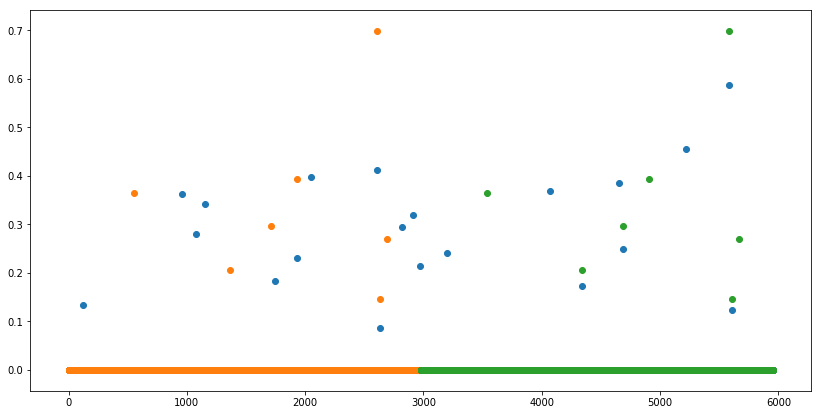

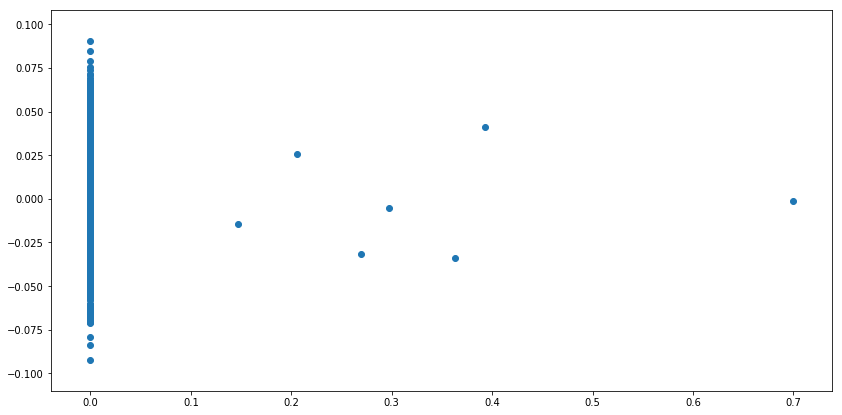

In [48]:
sample_index=np.random.randint(train_preg_ref_y_info.shape[0])
real_train=train_preg_ref_y_info[sample_index]
predicted_train=predictor_ANN_info.predict(train_preg_ref_X_info[sample_index].reshape(1, -1))[0]

plt.figure(figsize=(14,7))
plt.scatter(x=range(len(train_preg_ref_X_info[sample_index])),
            y=train_preg_ref_X_info[sample_index])
plt.scatter(x=range(len(real_train)),
            y=real_train)
plt.scatter(x=range(len(real_train),2*len(real_train)),
            y=real_train)

plt.figure(figsize=(14,7))
plt.scatter(x=real_train,
            y=predicted_train)

range(2977, 5954)

In [40]:
pearsonr(real_train[real_train>0],predicted_train[real_train>0])

(0.21781281751522705, 0.5199727505687173)

In [ ]:
not(predicted_train[real_train==0])
# predicted_train[real_train<=0]=0
# predicted_train

In [9]:
corr_coefs=[]

for sample_index in range(train_preg_ref_y_info.shape[0]):
    real_train=train_preg_ref_y_info[sample_index]
    predicted_train=predictor_ANN_info.predict(train_preg_ref_X_info[sample_index].reshape(1, -1))[0]
    pearson_r=pearsonr(real_train,predicted_train)
#     pearson_r=pearsonr(real_train[real_train>0],predicted_train[real_train>0])
    corr_coefs.append(pearson_r)

(array([   3.,   34.,  404., 1417., 2597., 2616., 1526.,  605.,   96.,
          17.]),
 array([-0.0682835 , -0.055118  , -0.04195251, -0.02878701, -0.01562152,
        -0.00245602,  0.01070947,  0.02387497,  0.03704046,  0.05020596,
         0.06337145]),
 <a list of 10 Patch objects>)

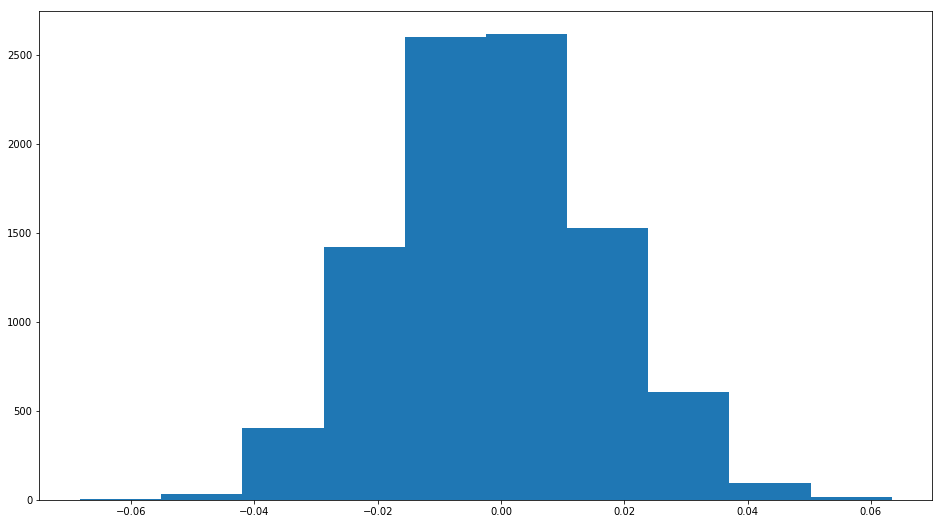

In [10]:
plt.figure(figsize=(16,9))
plt.hist(np.array(corr_coefs)[:,0])

In [ ]:
# corrs_165=pd.DataFrame(np.array(corr_coefs))
corrs_21=pd.DataFrame(np.array(corr_coefs))
# corrs_111=pd.DataFrame(np.array(corr_coefs))

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x=list(corrs_165.iloc[:,0]),
            y=list(corrs_21.iloc[:,0]))

# Basic Clasifiers

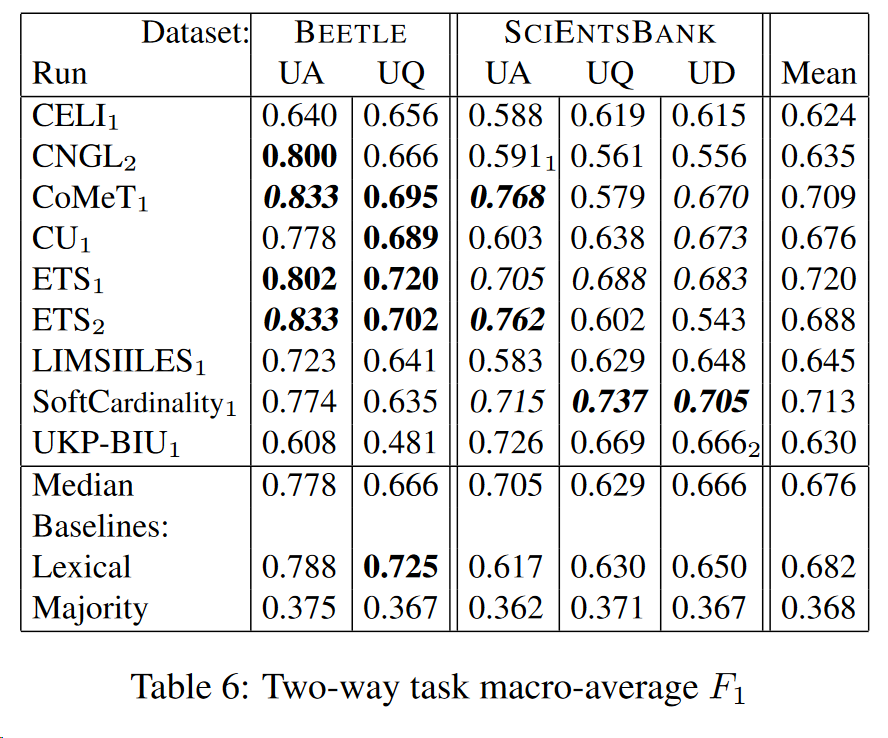

In [ ]:
# train_X=preg_res_X
# train_y=preg_res_y
# test_X=preg_res_X_test
# test_y=preg_res_y_test
# test_answers

train_X=train_preg_ref_res_X;print(train_X.shape)
train_y=train_preg_ref_res_y;print(train_y.shape)
test_X=test_preg_ref_res_X;print(test_X.shape)
test_y=test_preg_ref_res_y;print(test_y.shape)

## 1. Naïve Bayes

In [ ]:
gnb = GaussianNB()
predictor_GaussianNB= gnb.fit(train_X, train_y)
y_pred_GaussianNB= predictor_GaussianNB.predict(train_X)
print("Number of mislabeled points out of a total %d points : %d" % (train_X.shape[0],(train_y != y_pred_GaussianNB).sum()))

In [ ]:
print (f1_score(train_y, y_pred_GaussianNB, average='weighted'))

In [ ]:
y_test_GaussianNB = predictor_GaussianNB.predict(test_X)
print (f1_score(test_y, y_test_GaussianNB, average='weighted'))

In [ ]:
for test_class in test_divs:
    y_test_GaussianNB_class = predictor_GaussianNB.predict(test_X[test_answers.dtset==test_class])
    print(test_class, f1_score(test_y[test_answers.dtset==test_class], y_test_GaussianNB_class, average='weighted'))
    print(pd.crosstab(columns=test_y[test_answers.dtset==test_class], index=y_test_GaussianNB_class,margins=True))
    print("***********************************************************************")

In [ ]:
test_answers

## 2. FeedForward Fully conected ANN

In [ ]:
ANN_clf= MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(3500,500,100), random_state=1)
predictor_ANN_clf= ANN_clf.fit(train_X, train_y)
y_pred_ANN_clf= predictor_ANN_clf.predict(train_X)
print("Number of mislabeled points out of a total %d points : %d" % (train_X.shape[0],(train_y != y_pred_ANN_clf).sum()))

In [ ]:
print (f1_score(train_y, y_pred_ANN_clf, average='weighted'))

In [ ]:
y_test_ANN_clf = predictor_ANN_clf.predict(test_X)
print (f1_score(test_y, y_test_ANN_clf, average='weighted'))

In [ ]:
for test_class in test_divs:
    y_test_ANN_clf_class = predictor_ANN_clf.predict(test_X[test_answers.dtset==test_class])
    print(test_class, f1_score(test_y[test_answers.dtset==test_class], y_test_ANN_clf_class, average='weighted'))
    print(pd.crosstab(columns=test_y[test_answers.dtset==test_class], index=y_test_ANN_clf_class,margins=True))
    print("***********************************************************************")

In [ ]:
output = open('predictor_ANN_clf_3.pkl', 'wb')
pickle.dump(predictor_ANN_clf, output)# Pickle dictionary using protocol 0.
output.close()

In [ ]:
import pprint, pickle
pkl_file = open('predictor_ANN_clf_3.pkl', 'rb')
model_1_ANN = pickle.load(pkl_file)
pprint.pprint(model_1_ANN)

pkl_file.close()

# SKlearn Classifier Comparisson

In [ ]:
h = .02  # step size in the mesh

names = [
    "Nearest Neighbors", 
#     "Linear SVM", 
    "RBF SVM", 
#     "Gaussian Process",
#     "Decision Tree", 
    "Random Forest", 
    "Neural Net", 
    "AdaBoost",
#     "Naive Bayes", 
    "QDA"]

classifiers = [
    KNeighborsClassifier(3,n_jobs=-1),
#     SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=10, n_estimators=500,n_jobs=-1),
    MLPClassifier(learning_rate="adaptive",hidden_layer_sizes=(1000,100)),
    AdaBoostClassifier(n_estimators=200),
#     GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [ ]:
train_scores=[]
clasif_scores=[]
test_scores=[]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(train_X, train_y)
    
    prediction=clf.predict(train_X)
    score = f1_score(train_y, prediction, average='weighted')
    train_scores.append(score)
    print("Train Clasif:",score)
    print("Number of mislabeled points out of a total %d points in TEST dataset: %d" % (train_X.shape[0],(train_y != prediction).sum()))
    
    prediction_test=clf.predict(test_X)
    score_test = f1_score(test_y, prediction_test, average='weighted')
    test_scores.append(score_test)
    print("Test Clasif:",score_test)
    print("Number of mislabeled points out of a total %d points in TEST dataset: %d" % (test_X.shape[0],(test_y != prediction_test).sum()))
    
    test_scores=[]
    for test_class in test_divs:
        y_test_clf_class = clf.predict(test_X[test_answers==test_class])
        y_test_clf_class_f1=f1_score(test_y[test_answers==test_class], y_test_clf_class, average='weighted')
        test_scores.append(y_test_clf_class_f1)
        print(test_class,y_test_clf_class_f1)
        print(pd.crosstab(columns=test_y[test_answers==test_class], index=y_test_clf_class,margins=True))
        print("----------------------------------------------------------")
    clasif_scores.append(test_scores)
    print("***********************************************************************")

In [ ]:
results=pd.DataFrame(np.array(clasif_scores), columns=test_divs, index=names)#["KNN","Linear_SVM","RBF_SVM"])
results.append([[.788,.725]])

In [ ]:
results.T.plot(figsize=(16,9))

In [ ]:
results.to_csv("train_tf_idf_preg_ref_ans_clasificadores_2.csv")